<a href="https://colab.research.google.com/github/Onkar-Shahapurkar/full_waveform_lidar_training/blob/main/full_waveform_lidar_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/savcooley/full_waveform_lidar_training.git

Cloning into 'full_waveform_lidar_training'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 53 (delta 30), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 227.91 KiB | 3.21 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
!pip install earthaccess h5py geopandas matplotlib folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.0
    Uninstalling wrapt-2.0.0:
      Successfully uninstalled wrapt-2.0.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.5.0
    Uninstalling tenacity-8.5.0:
      Successfully uninstalled tenacity-8.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
!pip show earthaccess

Name: earthaccess
Version: 0.15.1
Summary: Client library for NASA Earthdata APIs
Home-page: 
Author: earthaccess contributors
Author-email: 
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: fsspec, importlib-resources, multimethod, pqdm, python-cmr, requests, s3fs, tenacity, tinynetrc, typing-extensions
Required-by: 


In [ ]:
!pip show h5py geopandas matplotlib folium

Name: h5py
Version: 3.15.1
Summary: Read and write HDF5 files from Python
Home-page: https://www.h5py.org/
Author: 
Author-email: Andrew Collette <andrew.collette@gmail.com>
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy
Required-by: h5netcdf, keras, tensorflow
---
Name: geopandas
Version: 1.1.1
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy, packaging, pandas, pyogrio, pyproj, shapely
Required-by: bigframes, libpysal
---
Name: matplotlib
Version: 3.10.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install earthaccess h5py geopandas matplotlib seaborn requests shapely folium

In [ ]:
!pip install --upgrade earthaccess

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import folium
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
import earthaccess

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
import os

username = "techie_onkar"   # not your email
password = "#Onkar_02814"

# create the .netrc file in your home directory
with open("/root/.netrc", "w") as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}\n")

# restrict file permissions for security
os.chmod("/root/.netrc", 0o600)

print("✅ .netrc file created successfully")


✅ .netrc file created successfully


In [ ]:
!pip install -q earthaccess
import earthaccess

auth = earthaccess.login(strategy="netrc")

if auth.authenticated:
    print("✅ Successfully authenticated with NASA Earthdata!")
else:
    print("❌ Authentication failed.")

✅ Successfully authenticated with NASA Earthdata!


In [ ]:
aoi_bbox = [73.75, 18.45, 73.95, 18.60]

In [ ]:
print(f"Area of Interest (Bounding Box): {aoi_bbox}")
print(f"Longitude range: {aoi_bbox[0]} to {aoi_bbox[2]}")
print(f"Latitude range: {aoi_bbox[1]} to {aoi_bbox[3]}")

Area of Interest (Bounding Box): [73.75, 18.45, 73.95, 18.6]
Longitude range: 73.75 to 73.95
Latitude range: 18.45 to 18.6


In [ ]:
start_date = "2020-04-01"
end_date = "2025-08-31"

print(f"Temporal range: {start_date} to {end_date}")

Temporal range: 2020-04-01 to 2025-08-31


In [ ]:
FULL_POWER_BEAMS = ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
print(f"Processing Full Power beams only: {FULL_POWER_BEAMS}")

Processing Full Power beams only: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']


In [ ]:
# Search for GEDI L1B granules - FIXED VERSION
def search_gedi_l1b(bbox, start_date, end_date, max_results=20):
    """
    Search for GEDI L1B granules - Fixed for newer earthaccess versions
    Increased max_results to have more options if files don't contain quality data

    Parameters:
    bbox: list of [min_lon, min_lat, max_lon, max_lat]
    """
    print(f"Searching for GEDI L1B data...")
    print(f"  Bounding box: {bbox}")
    print(f"  Date range: {start_date} to {end_date}")
    print(f"  Max results: {max_results}")

    # FIXED: Pass bounding box coordinates as separate arguments
    min_lon, min_lat, max_lon, max_lat = bbox

    try:
        results = earthaccess.search_data(
            short_name="GEDI01_B",
            version="002",
            bounding_box=(min_lon, min_lat, max_lon, max_lat),  # As tuple with 4 values
            temporal=(start_date, end_date),
            count=max_results
        )

        print(f"Found {len(results)} GEDI L1B granules")
        return results

    except Exception as e:
        print(f"Error in search: {str(e)}")
        print("Trying alternative bounding box format...")

        # Alternative format if the above doesn't work
        try:
            results = earthaccess.search_data(
                short_name="GEDI01_B",
                version="002",
                bounding_box=f"{min_lon},{min_lat},{max_lon},{max_lat}",  # As string
                temporal=(start_date, end_date),
                count=max_results
            )

            print(f"Found {len(results)} GEDI L1B granules")
            return results

        except Exception as e2:
            print(f"Second attempt failed: {str(e2)}")
            print("Trying without bounding box (will filter spatially later)...")

            # Last resort: search without spatial filter
            try:
                results = earthaccess.search_data(
                    short_name="GEDI01_B",
                    version="002",
                    temporal=(start_date, end_date),
                    count=max_results * 2  # Get more results to filter later
                )

                print(f"Found {len(results)} GEDI L1B granules (will filter spatially)")
                return results

            except Exception as e3:
                print(f"All search attempts failed: {str(e3)}")
                return []

In [ ]:
# Extract and process data - Full Power beams only
def extract_gedi_l1b_data(file_path, aoi_bbox, full_power_beams_only=True):
    """Extract GEDI L1B data with spatial filtering - Full Power beams only"""
    extracted_data = {}

    print(f"\nOpening GEDI file: {os.path.basename(file_path)}")

    try:
        with h5py.File(file_path, 'r') as gedi_file:
            # Get all beam names
            all_beam_names = [key for key in gedi_file.keys() if key.startswith('BEAM')]

            # Filter to Full Power beams only
            if full_power_beams_only:
                beam_names = [beam for beam in all_beam_names if beam in FULL_POWER_BEAMS]
                print(f"Available beams: {all_beam_names}")
                print(f"Full Power beams found: {beam_names}")
            else:
                beam_names = all_beam_names
                print(f"Available beams: {beam_names}")

            if not beam_names:
                print("❌ No Full Power beams found in this file!")
                return {}

            for beam in beam_names:
                try:
                    print(f"\n  Processing {beam}...")

                    # Check if required datasets exist
                    required_datasets = [
                        f'{beam}/geolocation/latitude_bin0',
                        f'{beam}/geolocation/longitude_bin0',
                        f'{beam}/shot_number',
                        f'{beam}/geolocation/degrade',
                        f'{beam}/stale_return_flag',
                        f'{beam}/geolocation/elevation_bin0'
                    ]

                    missing_datasets = [ds for ds in required_datasets if ds not in gedi_file]
                    if missing_datasets:
                        print(f"    ⚠️ Missing datasets: {missing_datasets}")
                        continue

                    # Extract coordinate data
                    lat = gedi_file[f'{beam}/geolocation/latitude_bin0'][:]
                    lon = gedi_file[f'{beam}/geolocation/longitude_bin0'][:]
                    shot_number = gedi_file[f'{beam}/shot_number'][:]
                    degrade_flag = gedi_file[f'{beam}/geolocation/degrade'][:]
                    stale_return_flag = gedi_file[f'{beam}/stale_return_flag'][:]
                    elev_bin0 = gedi_file[f'{beam}/geolocation/elevation_bin0'][:]

                    print(f"    Total shots in beam: {len(lat)}")

                    # Apply spatial filter
                    spatial_mask = (
                        (lon >= aoi_bbox[0]) & (lon <= aoi_bbox[2]) &
                        (lat >= aoi_bbox[1]) & (lat <= aoi_bbox[3])
                    )

                    spatial_shots = np.sum(spatial_mask)
                    print(f"    Shots in AOI: {spatial_shots}")

                    if spatial_shots > 0:
                        extracted_data[beam] = {
                            'latitude': lat[spatial_mask],
                            'longitude': lon[spatial_mask],
                            'shot_number': shot_number[spatial_mask],
                            'degrade_flag': degrade_flag[spatial_mask],
                            'stale_return_flag': stale_return_flag[spatial_mask],
                            'elevation_bin0': elev_bin0[spatial_mask]
                        }
                        print(f"    ✓ Extracted {spatial_shots} shots from {beam}")
                    else:
                        print(f"    ✗ No shots found in AOI for {beam}")

                except Exception as e:
                    print(f"    ❌ Error processing {beam}: {str(e)}")
                    continue

        return extracted_data

    except Exception as e:
        print(f"❌ Error opening file: {str(e)}")
        return {}

In [ ]:
# Apply quality filtering with detailed reporting
def apply_quality_filters(gedi_data, verbose=True):
    """Apply standard GEDI quality filters with detailed reporting"""
    if verbose:
        print(f"\nApplying quality filters...")
        print("  Criteria: degrade_flag = 0, stale_return_flag = 0")

    filtered_data = {}
    total_before = 0
    total_after = 0

    for beam, data in gedi_data.items():
        if len(data['shot_number']) == 0:
            continue

        # Apply quality filters
        quality_mask = (
            (data['degrade_flag'] == 0) &
            (data['stale_return_flag'] == 0)
        )

        shots_before = len(data['shot_number'])
        shots_after = np.sum(quality_mask)
        retention_rate = (shots_after / shots_before * 100) if shots_before > 0 else 0

        total_before += shots_before
        total_after += shots_after

        if verbose:
            print(f"  {beam}: {shots_before} → {shots_after} shots ({retention_rate:.1f}% retained)")

        if shots_after > 0:
            filtered_data[beam] = {
                'latitude': data['latitude'][quality_mask],
                'longitude': data['longitude'][quality_mask],
                'shot_number': data['shot_number'][quality_mask],
                'elevation_bin0': data['elevation_bin0'][quality_mask],
                'degrade_flag': data['degrade_flag'][quality_mask],
                'stale_return_flag': data['stale_return_flag'][quality_mask]
            }

    overall_retention = (total_after / total_before * 100) if total_before > 0 else 0

    if verbose:
        print(f"\nOverall: {total_before} → {total_after} shots ({overall_retention:.1f}% retained)")

    return filtered_data, overall_retention, total_after

def delete_file_safely(file_path):
    """Safely delete a file with confirmation"""
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"🗑️ Deleted file: {os.path.basename(file_path)}")
            return True
        else:
            print(f"⚠️ File not found for deletion: {file_path}")
            return False
    except Exception as e:
        print(f"❌ Error deleting file {file_path}: {str(e)}")
        return False


🔍 Searching for GEDI L1B granules...
Searching for GEDI L1B data...
  Bounding box: [73.75, 18.45, 73.95, 18.6]
  Date range: 2020-04-01 to 2025-08-31
  Max results: 20
Found 20 GEDI L1B granules

📋 Found granules:
  1. GEDI01_B_2020112085808_O07689_03_T04222_02_005_01_V002
  2. GEDI01_B_2020189165944_O08888_02_T01064_02_005_01_V002
  3. GEDI01_B_2020193152601_O08949_02_T03910_02_005_01_V002
  4. GEDI01_B_2020201213333_O09077_03_T02799_02_005_01_V002
  5. GEDI01_B_2020280142516_O10297_03_T08491_02_005_02_V002
  ... and 15 more granules

🚀 Starting processing with automatic retry...

ATTEMPT 1/5: Processing GEDI01_B_2020112085808_O07689_03_T04222_02_005_01_V002
📥 Downloading granule...


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Downloaded: GEDI01_B_2020112085808_O07689_03_T04222_02_005_01_V002.h5 (3.77 GB)

📊 Processing GEDI L1B data...

Opening GEDI file: GEDI01_B_2020112085808_O07689_03_T04222_02_005_01_V002.h5
Available beams: ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
Full Power beams found: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

  Processing BEAM0101...
    Total shots in beam: 144049
    Shots in AOI: 309
    ✓ Extracted 309 shots from BEAM0101

  Processing BEAM0110...
    Total shots in beam: 145108
    Shots in AOI: 330
    ✓ Extracted 330 shots from BEAM0110

  Processing BEAM1000...
    Total shots in beam: 145197
    Shots in AOI: 357
    ✓ Extracted 357 shots from BEAM1000

  Processing BEAM1011...
    Total shots in beam: 144209
    Shots in AOI: 369
    ✓ Extracted 369 shots from BEAM1011

Applying quality filters...
  Criteria: degrade_flag = 0, stale_return_flag = 0
  BEAM0101: 309 → 309 shots (100.0% retained)
  BEAM0110: 330

<Figure size 1600x1000 with 0 Axes>

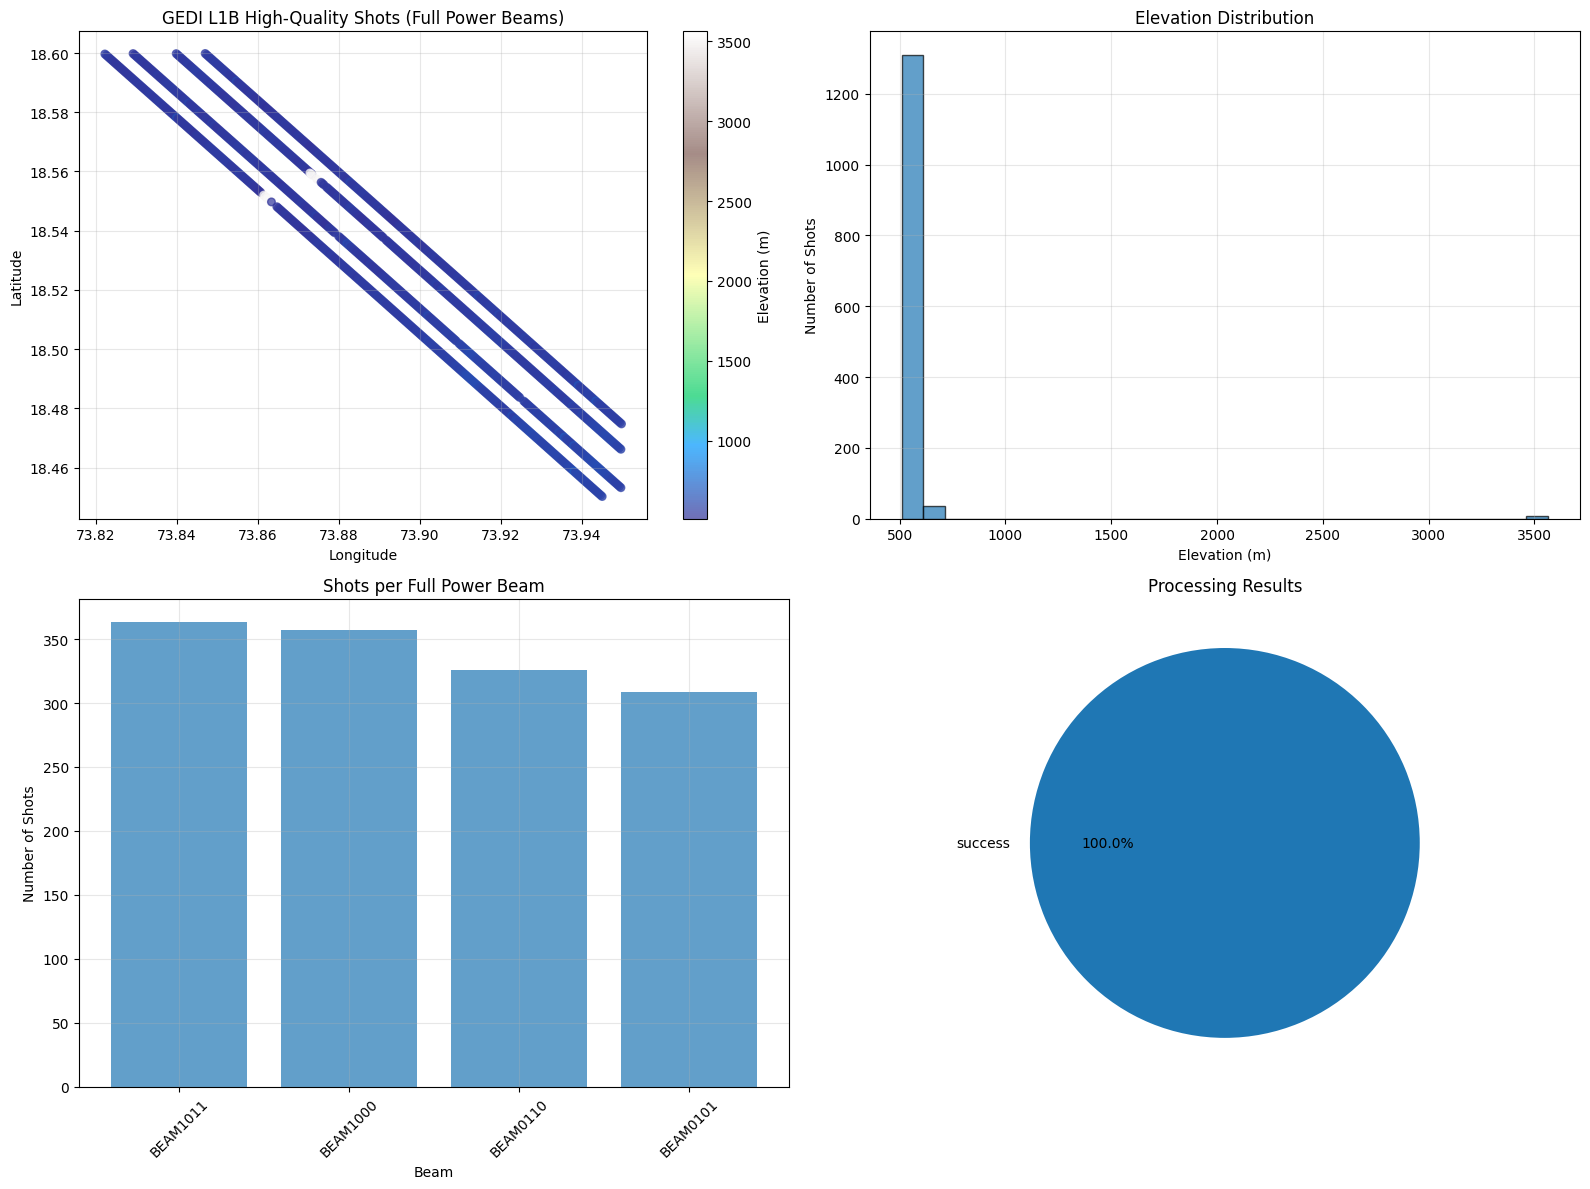


🗺️ Creating interactive map...

PROCESSING COMPLETE
✅ Data search completed
✅ Full Power beams processing only
✅ Automatic retry for quality data
✅ File cleanup for unusable data
✅ Results exported

🔧 Next steps:
   - Modify aoi_bbox for your study area
   - Adjust quality filtering criteria if needed
   - Add waveform analysis functions
   - Process additional granules if needed

📁 Output files saved to: ./gedi_L1B_outputs/


In [ ]:
def process_gedi_granules_with_retry(gedi_granules, aoi_bbox, max_attempts=5):
    """
    Process GEDI granules with automatic retry if no quality data is found

    Parameters:
    gedi_granules: list of granules from earthaccess search
    aoi_bbox: area of interest bounding box
    max_attempts: maximum number of files to try

    Returns:
    tuple: (success, result_df, processed_file_info)
    """

    download_dir = "./gedi_data"
    os.makedirs(download_dir, exist_ok=True)

    attempts = 0
    processed_files = []

    for i, granule in enumerate(gedi_granules):
        if attempts >= max_attempts:
            print(f"\n⚠️ Reached maximum attempts ({max_attempts}). Stopping.")
            break

        attempts += 1

        try:
            granule_id = granule['umm']['GranuleUR']
        except:
            granule_id = f"Granule_{i+1}"

        print(f"\n{'='*80}")
        print(f"ATTEMPT {attempts}/{max_attempts}: Processing {granule_id}")
        print(f"{'='*80}")

        # Download the granule
        print(f"📥 Downloading granule...")
        try:
            downloaded_files = earthaccess.download(
                [granule],  # Download single granule
                local_path=download_dir
            )

            if not downloaded_files:
                print(f"❌ Download failed for {granule_id}")
                continue

            sample_file = downloaded_files[0]
            file_size = os.path.getsize(sample_file) / 1e9
            print(f"✓ Downloaded: {os.path.basename(sample_file)} ({file_size:.2f} GB)")

        except Exception as e:
            print(f"❌ Download error for {granule_id}: {str(e)}")
            continue

        # Process the file
        print(f"\n📊 Processing GEDI L1B data...")

        # Extract data
        gedi_data = extract_gedi_l1b_data(sample_file, aoi_bbox, full_power_beams_only=True)

        if not gedi_data:
            print(f"❌ No spatial data found in AOI for {granule_id}")
            print(f"🗑️ Deleting file with no useful data...")
            delete_file_safely(sample_file)
            processed_files.append({
                'granule_id': granule_id,
                'file_name': os.path.basename(sample_file),
                'file_size_gb': file_size,
                'status': 'no_spatial_data',
                'shots_extracted': 0,
                'shots_after_qa': 0,
                'retention_rate': 0.0
            })
            continue

        # Apply quality filters
        filtered_gedi_data, retention_rate, shots_after_qa = apply_quality_filters(gedi_data, verbose=True)

        # Record processing info
        total_shots_extracted = sum(len(data['shot_number']) for data in gedi_data.values())
        processed_files.append({
            'granule_id': granule_id,
            'file_name': os.path.basename(sample_file),
            'file_size_gb': file_size,
            'status': 'processed',
            'shots_extracted': total_shots_extracted,
            'shots_after_qa': shots_after_qa,
            'retention_rate': retention_rate
        })

        # Check if we found quality data
        if shots_after_qa == 0:
            print(f"\n❌ No shots passed quality filtering for {granule_id}")
            print(f"🗑️ Deleting file with no quality data...")
            delete_file_safely(sample_file)
            processed_files[-1]['status'] = 'no_quality_data'

            if attempts < max_attempts:
                print(f"\n🔄 Trying next granule... ({attempts}/{max_attempts} attempts)")
            continue
        else:
            # Success! We found quality data
            print(f"\n🎉 SUCCESS! Found {shots_after_qa} high-quality shots in {granule_id}")

            # Create summary DataFrame
            print(f"\n📋 Creating summary DataFrame...")
            all_data = []

            for beam, data in filtered_gedi_data.items():
                beam_df = pd.DataFrame({
                    'granule_id': granule_id,
                    'beam': beam,
                    'shot_number': data['shot_number'],
                    'latitude': data['latitude'],
                    'longitude': data['longitude'],
                    'elevation_bin0': data['elevation_bin0'],
                    'degrade_flag': data['degrade_flag'],
                    'stale_return_flag': data['stale_return_flag']
                })
                all_data.append(beam_df)

            result_df = pd.concat(all_data, ignore_index=True)
            processed_files[-1]['status'] = 'success'

            return True, result_df, processed_files, sample_file

    # If we get here, no files had quality data
    print(f"\n❌ No granules contained quality data after {attempts} attempts")
    return False, None, processed_files, None

# Perform the search
print(f"\n🔍 Searching for GEDI L1B granules...")
gedi_granules = search_gedi_l1b(aoi_bbox, start_date, end_date, max_results=20)

if gedi_granules:
    print(f"\n📋 Found granules:")
    for i, granule in enumerate(gedi_granules[:5]):  # Show first 5
        try:
            granule_id = granule['umm']['GranuleUR']
            print(f"  {i+1}. {granule_id}")
        except:
            print(f"  {i+1}. Granule found (ID extraction failed)")

    if len(gedi_granules) > 5:
        print(f"  ... and {len(gedi_granules) - 5} more granules")

    # Process granules with automatic retry
    print(f"\n🚀 Starting processing with automatic retry...")
    success, result_df, processing_log, final_file = process_gedi_granules_with_retry(
        gedi_granules, aoi_bbox, max_attempts=5
    )

    # Display processing summary
    print(f"\n{'='*80}")
    print("PROCESSING SUMMARY")
    print(f"{'='*80}")

    processing_df = pd.DataFrame(processing_log)
    if not processing_df.empty:
        print(f"\nFiles processed:")
        for _, row in processing_df.iterrows():
            status_icon = {
                'success': '✅',
                'no_spatial_data': '🚫',
                'no_quality_data': '❌',
                'processed': '📊'
            }.get(row['status'], '❓')

            print(f"  {status_icon} {row['file_name']} ({row['file_size_gb']:.2f} GB)")
            print(f"      Status: {row['status']}")
            print(f"      Shots extracted: {row['shots_extracted']}")
            print(f"      Shots after QA: {row['shots_after_qa']}")
            print(f"      Retention rate: {row['retention_rate']:.1f}%")

    if success and result_df is not None:
        print(f"\n🎉 FINAL RESULTS:")
        print(f"  ✅ Successfully processed granule with quality data")
        print(f"  📊 Total high-quality shots: {len(result_df)}")
        print(f"  🎯 Full Power beams processed: {result_df['beam'].nunique()}")

        # Display sample data
        print(f"\n📋 Sample of processed data:")
        print(result_df.head(10))

        print(f"\n📈 Data summary:")
        print(f"  Beams processed: {result_df['beam'].nunique()}")
        print(f"  Shots per beam: {result_df.groupby('beam').size().to_dict()}")
        print(f"  Elevation range: {result_df['elevation_bin0'].min():.1f} to {result_df['elevation_bin0'].max():.1f} m")
        print(f"  Latitude range: {result_df['latitude'].min():.6f} to {result_df['latitude'].max():.6f}")
        print(f"  Longitude range: {result_df['longitude'].min():.6f} to {result_df['longitude'].max():.6f}")

        # Export results
        output_dir = "./gedi_L1B_outputs"
        os.makedirs(output_dir, exist_ok=True)

        # Export main results
        csv_path = os.path.join(output_dir, "gedi_l1b_quality_filtered_full_power.csv")
        result_df.to_csv(csv_path, index=False)
        print(f"\n💾 Results exported to: {csv_path}")

        # Export processing log
        log_path = os.path.join(output_dir, "processing_log.csv")
        processing_df.to_csv(log_path, index=False)
        print(f"💾 Processing log exported to: {log_path}")

        # Create visualization
        print(f"\n📊 Creating visualizations...")
        plt.figure(figsize=(16, 10))

        # Create subplot layout
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Shot locations colored by elevation
        scatter = ax1.scatter(result_df['longitude'], result_df['latitude'],
                            c=result_df['elevation_bin0'], cmap='terrain', s=30, alpha=0.7)
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.set_title('GEDI L1B High-Quality Shots (Full Power Beams)')
        ax1.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax1, label='Elevation (m)')

        # Plot 2: Elevation histogram
        ax2.hist(result_df['elevation_bin0'], bins=30, alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Elevation (m)')
        ax2.set_ylabel('Number of Shots')
        ax2.set_title('Elevation Distribution')
        ax2.grid(True, alpha=0.3)

        # Plot 3: Shots per beam
        beam_counts = result_df['beam'].value_counts()
        ax3.bar(beam_counts.index, beam_counts.values, alpha=0.7)
        ax3.set_xlabel('Beam')
        ax3.set_ylabel('Number of Shots')
        ax3.set_title('Shots per Full Power Beam')
        ax3.grid(True, alpha=0.3)
        plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

        # Plot 4: Processing attempts
        status_counts = processing_df['status'].value_counts()
        ax4.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
        ax4.set_title('Processing Results')

        plt.tight_layout()
        plt.show()

        # Create interactive map
        print(f"\n🗺️ Creating interactive map...")
        center_lat = result_df['latitude'].mean()
        center_lon = result_df['longitude'].mean()

        m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

        # Add AOI rectangle
        folium.Rectangle(
            bounds=[[aoi_bbox[1], aoi_bbox[0]], [aoi_bbox[3], aoi_bbox[2]]],
            fill=False,
            color='red',
            weight=3,
            popup='Area of Interest'
        ).add_to(m)

        # Color map for different beams
        beam_colors = {'BEAM0101': 'red', 'BEAM0110': 'blue', 'BEAM1000': 'green', 'BEAM1011': 'orange'}

        # Add points colored by beam
        for _, row in result_df.iterrows():
            color = beam_colors.get(row['beam'], 'gray')
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=4,
                popup=f"Beam: {row['beam']}Shot: {row['shot_number']}Elevation: {row['elevation_bin0']:.1f}m",
                color=color,
                fillColor=color,
                fillOpacity=0.7
            ).add_to(m)

        # Add legend
        legend_html = '''

        Full Power Beams
         BEAM0101
         BEAM0110
         BEAM1000
         BEAM1011

        '''
        m.get_root().html.add_child(folium.Element(legend_html))

        # Display map
        m

    else:
        print(f"\n❌ PROCESSING FAILED:")
        print(f"  No granules contained quality data in the AOI")
        print(f"  Files attempted: {len(processing_log)}")
        print(f"\n💡 Suggestions:")
        print(f"    - Expand your AOI bounding box")
        print(f"    - Try a different time period")
        print(f"    - Check if your AOI is in a valid GEDI coverage area (±51.6° latitude)")

else:
    print("❌ No granules found. Try expanding your search criteria.")

print(f"\n{'='*80}")
print("PROCESSING COMPLETE")
print(f"{'='*80}")
print("✅ Data search completed")
print("✅ Full Power beams processing only")
print("✅ Automatic retry for quality data")
print("✅ File cleanup for unusable data")
print("✅ Results exported")
print("\n🔧 Next steps:")
print("   - Modify aoi_bbox for your study area")
print("   - Adjust quality filtering criteria if needed")
print("   - Add waveform analysis functions")
print("   - Process additional granules if needed")
print("\n📁 Output files saved to: ./gedi_L1B_outputs/")


WAVEFORM VISUALIZATION MODULE - SIMPLIFIED

🎯 WAVEFORM ANALYSIS READY!
Data available: 1355 high-quality shots
Elevation_bin0 range: 510.6 to 3563.1 m
Mean elevation_bin0: 574.72 ± 228.42 m

🔧 USER CONFIGURATION:
   Standard deviations from mean: +2.0
   This will select shots with elevation_bin0 ≈ 1031.6 m
🎯 Target selection parameters:
   Mean elevation_bin0: 574.72 m
   Std elevation_bin0:  228.42 m
   Target elevation_bin0: 1031.55 m (+2.0σ)
📋 Selected 5 shots:
   1. Shot 76891100300255287: elevation_bin0=691.53m, Lat=18.458807, Lon=73.938072, Beam=BEAM1011
   2. Shot 76890800300260596: elevation_bin0=671.90m, Lat=18.470316, Lon=73.935705, Beam=BEAM1000
   3. Shot 76890500300255368: elevation_bin0=660.57m, Lat=18.482508, Lon=73.943504, Beam=BEAM0101
   4. Shot 76890800300260603: elevation_bin0=656.87m, Lat=18.467469, Lon=73.938037, Beam=BEAM1000
   5. Shot 76890500300255355: elevation_bin0=653.84m, Lat=18.487780, Lon=73.939175, Beam=BEAM0101

📊 Extracting waveforms from GEDI01_B_2

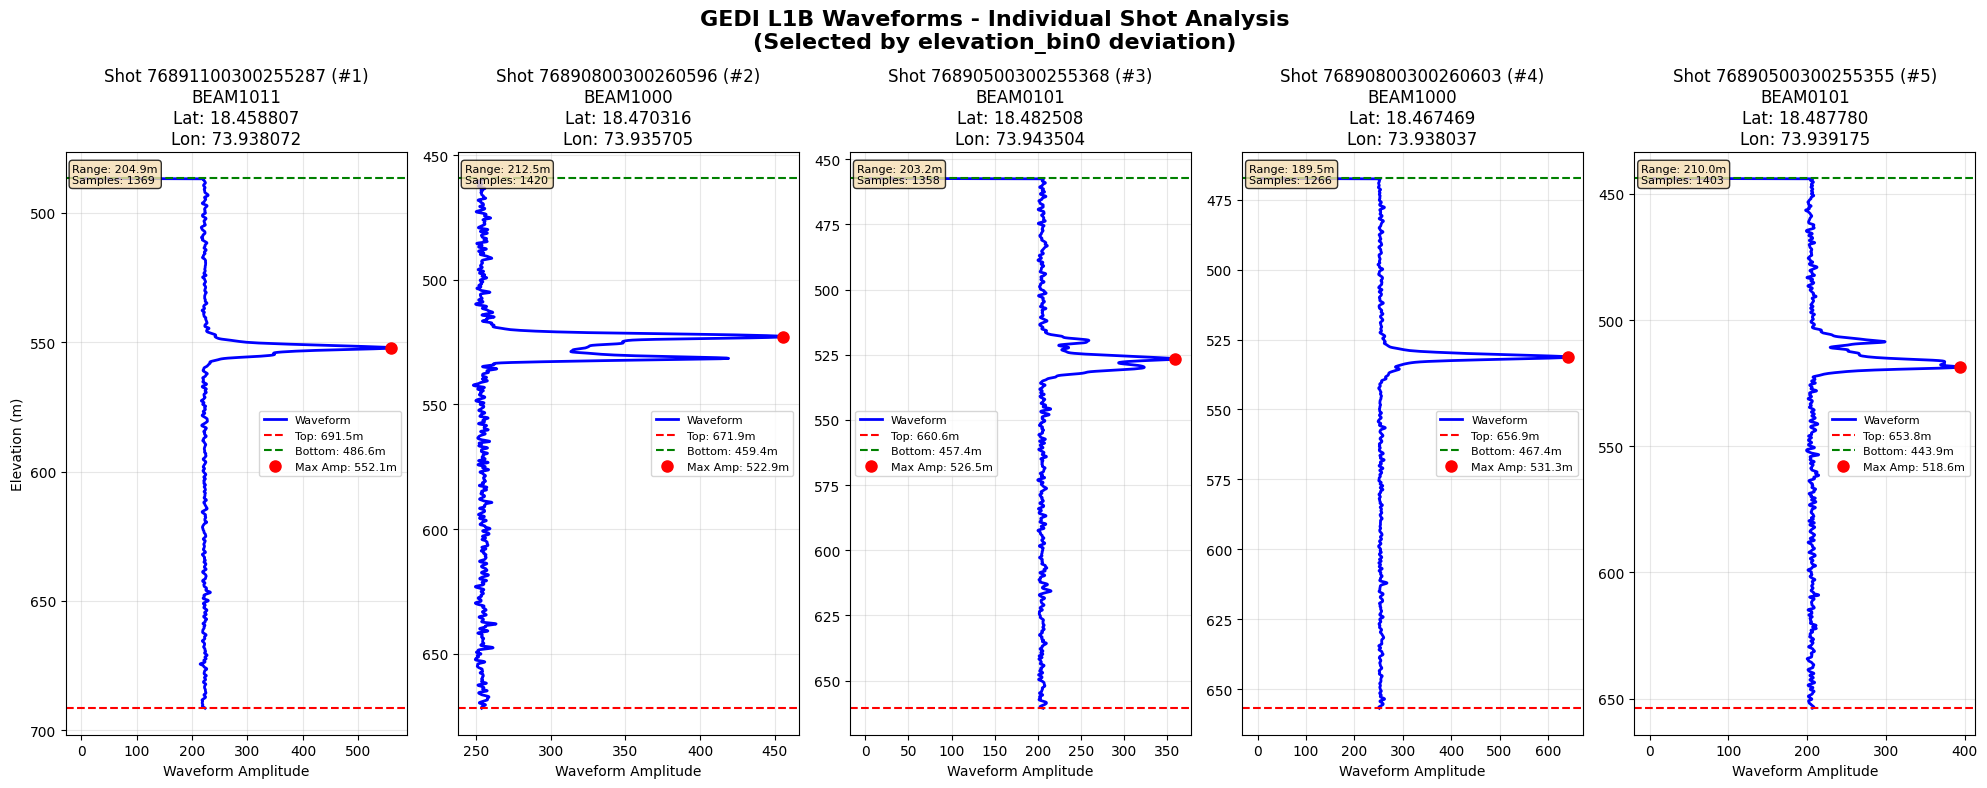


🗺️ Creating map with highlighted shots...

🗺️ Displaying map with highlighted shots...



📊 WAVEFORM ANALYSIS COMPLETE!
✅ 5 waveforms plotted based on elevation_bin0 selection
✅ Interactive map with highlighted shots created
✅ Individual shot locations and elevations displayed
✅ Waveform statistics and elevation markers shown

🔧 TO ANALYZE DIFFERENT SHOTS:
   Change 'user_sd_from_mean' value and re-run this code block
   Examples:
     user_sd_from_mean = 2.5   # Much higher elevations
     user_sd_from_mean = 0.0   # Average elevation shots
     user_sd_from_mean = -2.5  # Much lower elevations

📈 ELEVATION STATISTICS:
   Selected shots elevation range: 653.8 to 691.5 m
   Target elevation was: 1031.6 m
   Actual mean of selected: 666.9 m

WAVEFORM VISUALIZATION COMPLETE
✅ Elevation_bin0 based shot selection
✅ 5 individual waveform plots with elevation markers
✅ Interactive map with elevation-colored shots


In [ ]:
# GEDI L1B Waveform Visualization - Simplified Version
# Run this AFTER the main processing code block has completed successfully
# This code block uses elevation_bin0 for shot selection and waveform visualization

import numpy as np
import matplotlib.pyplot as plt
import folium
import h5py
import os

print(f"\n{'='*80}")
print("WAVEFORM VISUALIZATION MODULE - SIMPLIFIED")
print(f"{'='*80}")

def select_shots_by_elevation_deviation(result_df, sd_from_mean=1.2, n_shots=5):
    """
    Select shots based on standard deviations from mean elevation_bin0

    Parameters:
    result_df: DataFrame with shot data including elevation_bin0
    sd_from_mean: float, standard deviations from mean (positive or negative)
    n_shots: int, number of shots to select

    Returns:
    DataFrame with selected shots
    """

    mean_elevation = result_df['elevation_bin0'].mean()
    std_elevation = result_df['elevation_bin0'].std()
    target_elevation = mean_elevation + (sd_from_mean * std_elevation)

    print(f"🎯 Target selection parameters:")
    print(f"   Mean elevation_bin0: {mean_elevation:.2f} m")
    print(f"   Std elevation_bin0:  {std_elevation:.2f} m")
    print(f"   Target elevation_bin0: {target_elevation:.2f} m ({sd_from_mean:+.1f}σ)")

    # Calculate distance from target
    result_df_copy = result_df.copy()
    result_df_copy['elevation_distance'] = np.abs(result_df_copy['elevation_bin0'] - target_elevation)

    # Select the closest shots
    selected_shots = result_df_copy.nsmallest(n_shots, 'elevation_distance')

    print(f"📋 Selected {len(selected_shots)} shots:")
    for i, (_, row) in enumerate(selected_shots.iterrows()):
        print(f"   {i+1}. Shot {row['shot_number']}: elevation_bin0={row['elevation_bin0']:.2f}m, "
              f"Lat={row['latitude']:.6f}, Lon={row['longitude']:.6f}, Beam={row['beam']}")

    return selected_shots

def extract_and_plot_waveforms_simple(file_path, selected_shots):
    """
    Extract and plot waveforms for selected shots using elevation_bin0

    Parameters:
    file_path: str, path to GEDI L1B HDF5 file
    selected_shots: DataFrame with selected shot information
    """

    print(f"\n📊 Extracting waveforms from {os.path.basename(file_path)}...")

    waveform_data = []

    with h5py.File(file_path, 'r') as gedi_file:
        # Get the full waveform data for all Full Power beams
        rxwaveform_full = {}
        for beam in FULL_POWER_BEAMS:
            if beam in gedi_file:
                rxwaveform_full[beam] = gedi_file[f'{beam}/rxwaveform'][:]

        # Extract waveforms for each selected shot
        for i, (_, shot) in enumerate(selected_shots.iterrows()):
            beam = shot['beam']

            # We need to get all the required data from the HDF5 file
            # Find the shot in the original beam data
            shot_numbers = gedi_file[f'{beam}/shot_number'][:]
            shot_idx = np.where(shot_numbers == shot['shot_number'])[0]

            if len(shot_idx) == 0:
                print(f"   ⚠️ Shot {shot['shot_number']} not found in {beam}")
                continue

            shot_idx = shot_idx[0]

            # Get all the data we need from the file
            start_idx = gedi_file[f'{beam}/rx_sample_start_index'][shot_idx]
            sample_count = gedi_file[f'{beam}/rx_sample_count'][shot_idx]
            elevation_bin0 = gedi_file[f'{beam}/geolocation/elevation_bin0'][shot_idx]
            elevation_lastbin = gedi_file[f'{beam}/geolocation/elevation_lastbin'][shot_idx]

            if beam in rxwaveform_full and sample_count > 0:
                # Extract the waveform
                waveform = rxwaveform_full[beam][start_idx:start_idx + sample_count]

                # Create elevation array for this waveform
                elevations = np.linspace(elevation_bin0, elevation_lastbin, len(waveform))

                waveform_data.append({
                    'shot_number': shot['shot_number'],
                    'beam': beam,
                    'latitude': shot['latitude'],
                    'longitude': shot['longitude'],
                    'elevation_bin0': elevation_bin0,
                    'elevation_lastbin': elevation_lastbin,
                    'waveform': waveform,
                    'elevations': elevations,
                    'elevation_range': elevation_bin0 - elevation_lastbin,
                    'selection_rank': i + 1
                })

                print(f"   ✅ Extracted waveform for shot {shot['shot_number']} ({len(waveform)} samples)")
            else:
                print(f"   ⚠️ Could not extract waveform for shot {shot['shot_number']} in {beam}")

    if not waveform_data:
        print("❌ No waveforms could be extracted")
        return None

    print(f"✅ Extracted {len(waveform_data)} waveforms")

    # Create the waveform plots
    fig, axes = plt.subplots(1, len(waveform_data), figsize=(4*len(waveform_data), 8), sharey=False)

    if len(waveform_data) == 1:
        axes = [axes]

    for i, (ax, wf_data) in enumerate(zip(axes, waveform_data)):
        # Plot the waveform
        ax.plot(wf_data['waveform'], wf_data['elevations'], 'b-', linewidth=2, label='Waveform')

        # Mark the top of waveform (elevation_bin0)
        ax.axhline(y=wf_data['elevation_bin0'], color='red', linestyle='--',
                  label=f'Top: {wf_data["elevation_bin0"]:.1f}m')

        # Mark the bottom of waveform (elevation_lastbin)
        ax.axhline(y=wf_data['elevation_lastbin'], color='green', linestyle='--',
                  label=f'Bottom: {wf_data["elevation_lastbin"]:.1f}m')

        # Find and mark the maximum amplitude point
        max_amp_idx = np.argmax(wf_data['waveform'])
        max_amp_elevation = wf_data['elevations'][max_amp_idx]
        max_amp_value = wf_data['waveform'][max_amp_idx]
        ax.plot(max_amp_value, max_amp_elevation, 'ro', markersize=8,
               label=f'Max Amp: {max_amp_elevation:.1f}m')

        # Formatting
        ax.set_xlabel('Waveform Amplitude')
        if i == 0:
            ax.set_ylabel('Elevation (m)')

        ax.set_title(f"Shot {wf_data['shot_number']} (#{wf_data['selection_rank']})\n"
                    f"{wf_data['beam']}\n"
                    f"Lat: {wf_data['latitude']:.6f}\n"
                    f"Lon: {wf_data['longitude']:.6f}")

        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
        ax.invert_yaxis()  # Higher elevations at top

        # Add some stats as text
        stats_text = f"Range: {wf_data['elevation_range']:.1f}m\nSamples: {len(wf_data['waveform'])}"
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
               verticalalignment='top', fontsize=8,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.suptitle('GEDI L1B Waveforms - Individual Shot Analysis\n(Selected by elevation_bin0 deviation)',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return waveform_data

def create_highlighted_map_simple(result_df, selected_shots):
    """
    Create an interactive map highlighting the selected shots

    Parameters:
    result_df: DataFrame with all shot data
    selected_shots: DataFrame with selected shots to highlight
    """

    print(f"\n🗺️ Creating map with highlighted shots...")

    # Calculate map center
    center_lat = result_df['latitude'].mean()
    center_lon = result_df['longitude'].mean()

    # Create map
    m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

    # Add AOI rectangle
    folium.Rectangle(
        bounds=[[aoi_bbox[1], aoi_bbox[0]], [aoi_bbox[3], aoi_bbox[2]]],
        fill=False,
        color='red',
        weight=3,
        popup='Area of Interest'
    ).add_to(m)

    # Color map for different beams
    beam_colors = {'BEAM0101': 'red', 'BEAM0110': 'blue', 'BEAM1000': 'green', 'BEAM1011': 'orange'}

    # Add all shots as small points colored by elevation_bin0
    min_elev = result_df['elevation_bin0'].min()
    max_elev = result_df['elevation_bin0'].max()

    for _, row in result_df.iterrows():
        # Color based on elevation (normalized to 0-1)
        elev_norm = (row['elevation_bin0'] - min_elev) / (max_elev - min_elev) if max_elev > min_elev else 0.5

        # Use a color scale from blue (low) to red (high)
        if elev_norm < 0.33:
            color = 'blue'
        elif elev_norm < 0.67:
            color = 'green'
        else:
            color = 'red'

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            popup=f"Beam: {row['beam']}"
                  f"Shot: {row['shot_number']}"
                  f"Elevation: {row['elevation_bin0']:.1f}m",
            color=color,
            fillColor=color,
            fillOpacity=0.4,
            weight=1
        ).add_to(m)

    # Highlight selected shots with large, distinctive markers
    for i, (_, shot) in enumerate(selected_shots.iterrows()):
        # Large highlighted marker
        folium.CircleMarker(
            location=[shot['latitude'], shot['longitude']],
            radius=15,
            popup=f"SELECTED SHOT {i+1}"
                  f"Beam: {shot['beam']}"
                  f"Shot: {shot['shot_number']}"
                  f"Elevation_bin0: {shot['elevation_bin0']:.2f}m"
                  f"Lat: {shot['latitude']:.6f}"
                  f"Lon: {shot['longitude']:.6f}",
            color='black',
            fillColor='yellow',
            fillOpacity=0.9,
            weight=4
        ).add_to(m)

        # Add number label
        folium.Marker(
            location=[shot['latitude'], shot['longitude']],
            popup=f"Selected Shot {i+1}",
            icon=folium.DivIcon(
                html=f"{i+1}",
                icon_size=(25, 25),
                icon_anchor=(12, 12)
            )
        ).add_to(m)

    # Add legend
    legend_html = f'''

    GEDI L1B Shots
    Elevation Color Scale:
     Low ({min_elev:.0f}m)
     Medium
     High ({max_elev:.0f}m)
    🟡 Selected for Waveform Analysis
    🔴 AOI Boundary

    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    return m

# USER INTERFACE: Simplified Waveform Analysis
# Check if we have the required data from the main processing block
if 'result_df' in locals() and result_df is not None and 'final_file' in locals() and final_file is not None:
    print(f"\n🎯 WAVEFORM ANALYSIS READY!")
    print(f"Data available: {len(result_df)} high-quality shots")
    print(f"Elevation_bin0 range: {result_df['elevation_bin0'].min():.1f} to {result_df['elevation_bin0'].max():.1f} m")
    print(f"Mean elevation_bin0: {result_df['elevation_bin0'].mean():.2f} ± {result_df['elevation_bin0'].std():.2f} m")

    # USER CONFIGURATION: Set your desired standard deviation
    # Examples:
    #   2  = 2 standard deviations ABOVE mean (higher elevations)
    #   0.0  = closest to mean (average elevations)
    #  -1.5  = 1.5 standard deviations BELOW mean (lower elevations)

    user_sd_from_mean = 2  # 🔧 CHANGE THIS VALUE

    print(f"\n🔧 USER CONFIGURATION:")
    print(f"   Standard deviations from mean: {user_sd_from_mean:+.1f}")
    target_elev = result_df['elevation_bin0'].mean() + user_sd_from_mean * result_df['elevation_bin0'].std()
    print(f"   This will select shots with elevation_bin0 ≈ {target_elev:.1f} m")

    # Select shots based on user criteria
    selected_shots = select_shots_by_elevation_deviation(
        result_df,
        sd_from_mean=user_sd_from_mean,
        n_shots=5
    )

    # Extract and plot waveforms
    waveform_data = extract_and_plot_waveforms_simple(final_file, selected_shots)

    # Create highlighted map
    if waveform_data:
        highlighted_map = create_highlighted_map_simple(result_df, selected_shots)
        print(f"\n🗺️ Displaying map with highlighted shots...")
        display(highlighted_map)  # Use display() for better rendering in notebooks

    print(f"\n📊 WAVEFORM ANALYSIS COMPLETE!")
    print(f"✅ 5 waveforms plotted based on elevation_bin0 selection")
    print(f"✅ Interactive map with highlighted shots created")
    print(f"✅ Individual shot locations and elevations displayed")
    print(f"✅ Waveform statistics and elevation markers shown")

    print(f"\n🔧 TO ANALYZE DIFFERENT SHOTS:")
    print(f"   Change 'user_sd_from_mean' value and re-run this code block")
    print(f"   Examples:")
    print(f"     user_sd_from_mean = 2.5   # Much higher elevations")
    print(f"     user_sd_from_mean = 0.0   # Average elevation shots")
    print(f"     user_sd_from_mean = -2.5  # Much lower elevations")

    print(f"\n📈 ELEVATION STATISTICS:")
    print(f"   Selected shots elevation range: {selected_shots['elevation_bin0'].min():.1f} to {selected_shots['elevation_bin0'].max():.1f} m")
    print(f"   Target elevation was: {target_elev:.1f} m")
    print(f"   Actual mean of selected: {selected_shots['elevation_bin0'].mean():.1f} m")

else:
    print(f"\n❌ No data available for waveform analysis")
    print(f"   Please run the main data processing code block first")
    print(f"   Required variables: 'result_df' and 'final_file'")

    # Check what variables are available
    if 'CURRENT_RESULT_DF' in locals() and CURRENT_RESULT_DF is not None:
        print(f"\n💡 Found 'CURRENT_RESULT_DF' - using this instead...")
        result_df = CURRENT_RESULT_DF
        if 'CURRENT_FILE' in locals():
            final_file = CURRENT_FILE
            print(f"   Also found 'CURRENT_FILE' - ready to proceed!")
            # You can now re-run the analysis section above
        else:
            print(f"   But 'CURRENT_FILE' not found - cannot extract waveforms")
    else:
        print(f"   Available variables: {[var for var in locals().keys() if not var.startswith('_')]}")

print(f"\n{'='*80}")
print("WAVEFORM VISUALIZATION COMPLETE")
print(f"{'='*80}")
print("✅ Elevation_bin0 based shot selection")
print("✅ 5 individual waveform plots with elevation markers")
print("✅ Interactive map with elevation-colored shots")

In [ ]:
# Clean notebook metadata (run this before saving to GitHub)
import json
import os
from google.colab import files

# This will clean the current notebook's metadata
print("Cleaning notebook metadata...")
print("After running this, save the notebook to GitHub again")

Cleaning notebook metadata...
After running this, save the notebook to GitHub again
